<a href="https://colab.research.google.com/github/Whisperer8526/Kaggle-Competitions/blob/main/Titanic%20-%20data%20processing%20pipeline%20%5Bdraft%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

train = files.upload()

Saving train.csv to train.csv


In [2]:
test = files.upload()

Saving test.csv to test.csv


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
data = train_data.copy()

# Brief EDA and data processing

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# to avoid data noise from rare titles I'm grouping them into 5 buckets
other = ["Rev.", "Dr.", "Major.",
          "Lady.", "Sir.", "Col.", "Capt.", "Countess.", "Jonkheer.", "Don.", "Dona."]
miss = ["Miss.", "Mlle.", "Ms."]
master = ["Master."]
mr = ["Mr. "]
mrs = ["Mrs.", "Mme."]

for name in data["Name"]:
  for title in other:
    if title in name:
      data["Name"].replace(name, 'other', inplace=True)
  for title in miss:
    if title in name:
      data["Name"].replace(name, 'miss', inplace=True)
  for title in master:
    if title in name:
      data["Name"].replace(name, 'master', inplace=True)
  for title in mr:
    if title in name:
      data["Name"].replace(name, 'mr', inplace=True)
  for title in mrs:
    if title in name:
      data["Name"].replace(name, 'mrs', inplace=True)

In [ ]:
decks = ["A", "B", "C", "D", "E", "F", "G", "T"]

for cabin in data["Cabin"]:
  for letter in decks:
    if letter in str(cabin):
      data["Cabin"].replace(cabin, letter, inplace=True)

data["Cabin"].fillna("U", inplace=True)

In [6]:
# Can't see reasonable way to use Ticket info - in the future try to explore people sharing one ticket.

data.drop(['Ticket'], inplace=True, axis=1)

In [ ]:
# New feature telling if a passenger is either travelling alone or not

data.loc[data['SibSp'] & data['Parch'] < 1 , 'Not_alone'] = 0
data.loc[data['SibSp'] | data['Parch'] > 0 , 'Not_alone'] = 1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Not_alone
0,1,0,3,mr,male,22.0,1,0,7.2500,U,S,1.0
1,2,1,1,mrs,female,38.0,1,0,71.2833,C,C,1.0
2,3,1,3,miss,female,26.0,0,0,7.9250,U,S,0.0
3,4,1,1,mrs,female,35.0,1,0,53.1000,C,S,1.0
4,5,0,3,mr,male,35.0,0,0,8.0500,U,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,other,male,27.0,0,0,13.0000,U,S,0.0
887,888,1,1,miss,female,19.0,0,0,30.0000,B,S,0.0
888,889,0,3,miss,female,NaN,1,2,23.4500,U,S,1.0
889,890,1,1,mr,male,26.0,0,0,30.0000,C,C,0.0


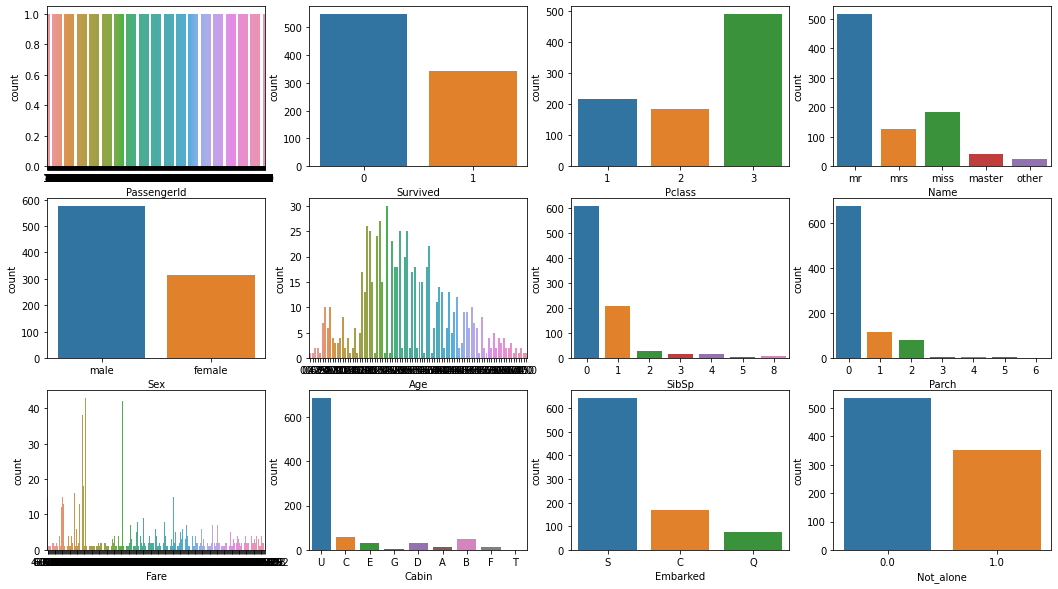

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(18, 10))
idx = ((x,y) for x in range(3) for y in range(4))

for column in data.columns:
  sns.countplot(x=column, data=data, ax=axes[next(idx)])

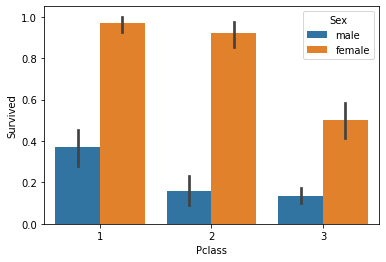

In [ ]:
sns.barplot(x=data['Pclass'], y=data['Survived'], hue=data['Sex'])

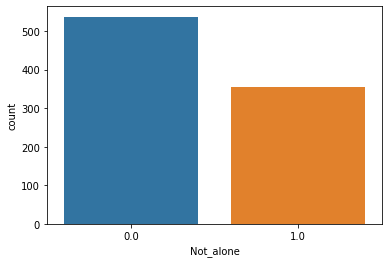

In [ ]:
sns.countplot(x=data['Not_alone'])

In [ ]:
# One Hot Encoding of categorical features

classes = pd.get_dummies(data.Pclass, prefix="Pclass")
title = pd.get_dummies(data.Name, prefix="title")
sex = pd.get_dummies(data.Sex, prefix="sex")
cabin = pd.get_dummies(data.Cabin, prefix="cabin")
embarked = pd.get_dummies(data.Embarked, prefix="embarked")

In [ ]:
numeric = data[["Age", "SibSp", "Parch", "Fare"]]

In [ ]:
encoded_set = pd.concat([classes, title, sex, cabin, embarked, numeric, data['Not_alone']], axis=1)
encoded_set


,Pclass_1,Pclass_2,Pclass_3,title_master,title_miss,title_mr,title_mrs,title_other,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,embarked_C,embarked_Q,embarked_S,Age,SibSp,Parch,Fare,Not_alone
0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,22.0,1,0,7.2500,1.0
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,38.0,1,0,71.2833,1.0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,26.0,0,0,7.9250,0.0
3,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,35.0,1,0,53.1000,1.0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,27.0,0,0,13.0000,0.0
887,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,19.0,0,0,30.0000,0.0
888,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,1,2,23.4500,1.0
889,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,26.0,0,0,30.0000,0.0


In [ ]:
 # Imputing missing values with K-Nearest Neighbor imputer
 # It's more accurate than simpe imputer which cause occurence of enourmous peaks with median value
 
 from sklearn.impute import KNNImputer
 imputer = KNNImputer(n_neighbors=5)
 imputed = imputer.fit_transform(encoded_set)
 train_dataset = pd.DataFrame(data=imputed, columns=encoded_set.columns)

In [ ]:
 train_dataset = train_dataset.reindex(sorted(train_dataset.columns), axis=1)
 train_dataset

,Age,Fare,Not_alone,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title_master,title_miss,title_mr,title_mrs,title_other
0,22.0,7.2500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35.0,53.1000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,19.0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
888,13.2,23.4500,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
889,26.0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  4.,  4.,
         6.,  7., 18., 15., 26., 26., 16., 41., 33., 16., 31., 32., 21.,
        22., 42., 29., 49., 23., 26., 27., 22., 26., 24., 13., 11., 14.,
        15., 22., 16.,  8., 10., 15.,  5., 11., 11.,  6., 10., 11.,  6.,
         3.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

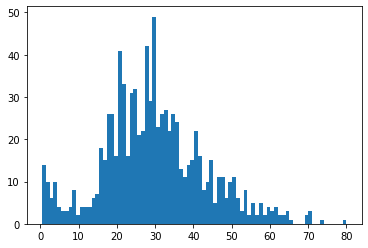

In [ ]:
# Check age distribution after imputation

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(train_dataset["Age"] , bins=80)

In [ ]:
# Scaling data for the sake of better algorythm performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_dataset)

In [ ]:
train_dataset.shape

(891, 27)

In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Test data processing

In [ ]:
# Names transformation

for name in test_data["Name"]:
  for title in other:
    if title in name:
      test_data["Name"].replace(name, 'other', inplace=True)
  for title in miss:
    if title in name:
      test_data["Name"].replace(name, 'miss', inplace=True)
  for title in master:
    if title in name:
      test_data["Name"].replace(name, 'master', inplace=True)
  for title in mr:
    if title in name:
      test_data["Name"].replace(name, 'mr', inplace=True)
  for title in mrs:
    if title in name:
      test_data["Name"].replace(name, 'mrs', inplace=True)

# Cabin tranformation

decks = ["A", "B", "C", "D", "E", "F", "G", "T"]

for cabin in test_data["Cabin"]:
  for letter in decks:
    if letter in str(cabin):
      test_data["Cabin"].replace(cabin, letter, inplace=True)

test_data["Cabin"].fillna("U", inplace=True)

# Getting rid of Ticket info
test_data.drop(['Ticket'], inplace=True, axis=1)

# Adding 'Not Alone' feature
test_data.loc[test_data['SibSp'] & test_data['Parch'] < 1 , 'Not_alone'] = 0
test_data.loc[test_data['SibSp'] | test_data['Parch'] > 0 , 'Not_alone'] = 1

#One Hot Encoding of catogrical feaures
classes = pd.get_dummies(test_data.Pclass, prefix="Pclass")
title = pd.get_dummies(test_data.Name, prefix="title")
sex = pd.get_dummies(test_data.Sex, prefix="sex")
cabin = pd.get_dummies(test_data.Cabin, prefix="cabin")
embarked = pd.get_dummies(test_data.Embarked, prefix="embarked")
numeric = test_data[["Age", "SibSp", "Parch", "Fare"]]
encoded_testset = pd.concat([classes, title, sex, cabin, embarked, numeric, test_data['Not_alone']], axis=1)

# Imputing missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_testset = imputer.fit_transform(encoded_testset)
test_dataset = pd.DataFrame(data=imputed_testset, columns=encoded_testset.columns)

# Sorting dataset
test_dataset = test_dataset.reindex(sorted(test_dataset.columns), axis=1)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(test_dataset)

In [ ]:
test_dataset

,Age,Fare,Not_alone,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_U,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,title_master,title_miss,title_mr,title_mrs,title_other
0,34.5,7.8292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,47.0,7.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,62.0,9.6875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,27.0,8.6625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,22.0,12.2875,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,33.7,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
414,39.0,108.9000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
415,38.5,7.2500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
416,33.7,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test.shape

(418, 26)

In [ ]:
# Adding missing columns to Test Set

train_col = []

for col in train_dataset.columns:
  if col not in test_dataset.columns:
    train_col.append(col)

test_col = []

for col in test_dataset.columns:
  if col not in train_dataset.columns:
    train_col.append(col)

for col in train_col:
  test_dataset.insert(0, col, 0)

train_dataset = train_dataset.reindex(sorted(train_dataset.columns), axis=1)
test_dataset = test_dataset.reindex(sorted(test_dataset.columns), axis=1)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           891 non-null    float64
 1   Fare          891 non-null    float64
 2   Not_alone     891 non-null    float64
 3   Parch         891 non-null    float64
 4   Pclass_1      891 non-null    float64
 5   Pclass_2      891 non-null    float64
 6   Pclass_3      891 non-null    float64
 7   SibSp         891 non-null    float64
 8   cabin_A       891 non-null    float64
 9   cabin_B       891 non-null    float64
 10  cabin_C       891 non-null    float64
 11  cabin_D       891 non-null    float64
 12  cabin_E       891 non-null    float64
 13  cabin_F       891 non-null    float64
 14  cabin_G       891 non-null    float64
 15  cabin_T       891 non-null    float64
 16  cabin_U       891 non-null    float64
 17  embarked_C    891 non-null    float64
 18  embarked_Q    891 non-null    

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   Fare          418 non-null    float64
 2   Not_alone     418 non-null    float64
 3   Parch         418 non-null    float64
 4   Pclass_1      418 non-null    float64
 5   Pclass_2      418 non-null    float64
 6   Pclass_3      418 non-null    float64
 7   SibSp         418 non-null    float64
 8   cabin_A       418 non-null    float64
 9   cabin_B       418 non-null    float64
 10  cabin_C       418 non-null    float64
 11  cabin_D       418 non-null    float64
 12  cabin_E       418 non-null    float64
 13  cabin_F       418 non-null    float64
 14  cabin_G       418 non-null    float64
 15  cabin_T       418 non-null    int64  
 16  cabin_U       418 non-null    float64
 17  embarked_C    418 non-null    float64
 18  embarked_Q    418 non-null    

In [ ]:
import numpy as np

X_train = train_dataset
y_train = np.array(data["Survived"])
X_test = test_dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(train_dataset)
X_test = scaler.fit_transform(test_dataset)
X_train.shape

(891, 27)

In [ ]:
X_test.shape

(418, 27)

In [ ]:
X_train_npy = np.save("X_train.npy", X_train)
X_test_npy = np.save("X_test.npy", X_test)
y_train_npy = np.save("y_train.npy", y_train)

In [ ]:
from tensorflow import keras
from functools import partial

RegularDense = partial(keras.layers.Dense,
                       activation="elu", 
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l1_l2(0.001))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer())
model.add(RegularDense(74))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(148))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(296))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(148))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(74))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(37))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(19))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(10))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="sigmoid",
                                  kernel_initializer="glorot_uniform"))

ValueError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy",
             optimizer=Adam(learning_rate=0.01),
             metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                   batch_size=32, validation_split=0.15, 
                    shuffle=True)

Epoch 1/100
24/24 [==============================] - 3s 19ms/step - loss: 0.6115 - accuracy: 0.6855 - val_loss: 1.1091 - val_accuracy: 0.8134
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.7840 - val_loss: 0.6592 - val_accuracy: 0.8358
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.7914 - val_loss: 0.6808 - val_accuracy: 0.8582
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.8135 - val_loss: 0.9288 - val_accuracy: 0.8582
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4085 - accuracy: 0.8391 - val_loss: 0.5253 - val_accuracy: 0.8134
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4524 - accuracy: 0.8263 - val_loss: 0.6515 - val_accuracy: 0.8582
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8124 - val_loss: 0.6125 - val_accuracy: 0.8134
Epoch 8/100
